In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
import numpy as np

In [3]:
df =pd.read_csv("C:\\Users\\nsuka\\Desktop\\Project\\Car_Sales_Project\\vehicles_us.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [6]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [7]:
df.columns

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed'],
      dtype='object')

In [8]:
df.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df['model_year'] = df['model_year'].fillna(df.groupby('model')['model_year'].transform('median'))

In [11]:
df['cylinders'] = df['cylinders'].fillna(df.groupby('model')['cylinders'].transform('median'))

In [12]:
df['is_4wd'] = df['is_4wd'].fillna(df.groupby('model')['is_4wd'].transform(lambda x: x.mode()[0] if not x.mode().empty else 0))

In [13]:
df['paint_color'] = df['paint_color'].fillna(df.groupby('model')['paint_color'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))

In [14]:
df['odometer'] = df['odometer'].fillna(df['odometer'].median())

In [15]:
df.shape

(51525, 13)

In [16]:
df.isnull().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

In [17]:
df['date_posted']=pd.to_datetime(df['date_posted'])

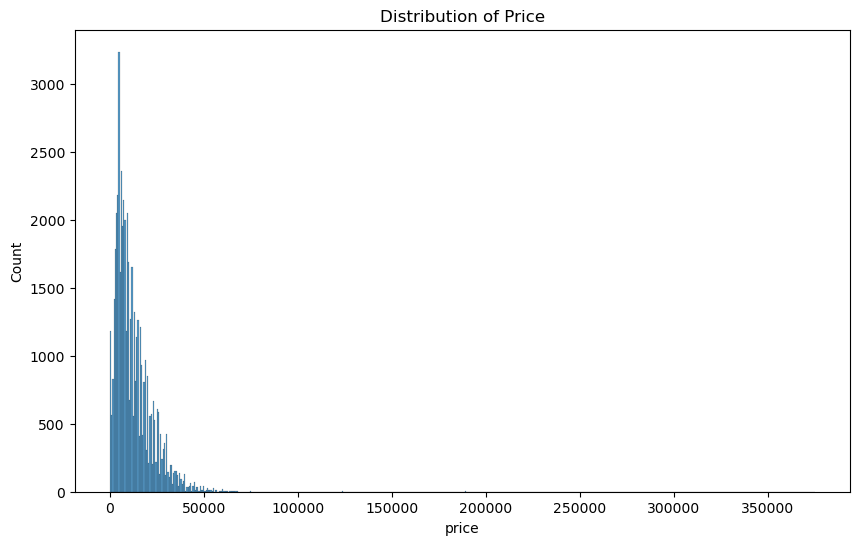

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'])
plt.title('Distribution of Price')
plt.show()

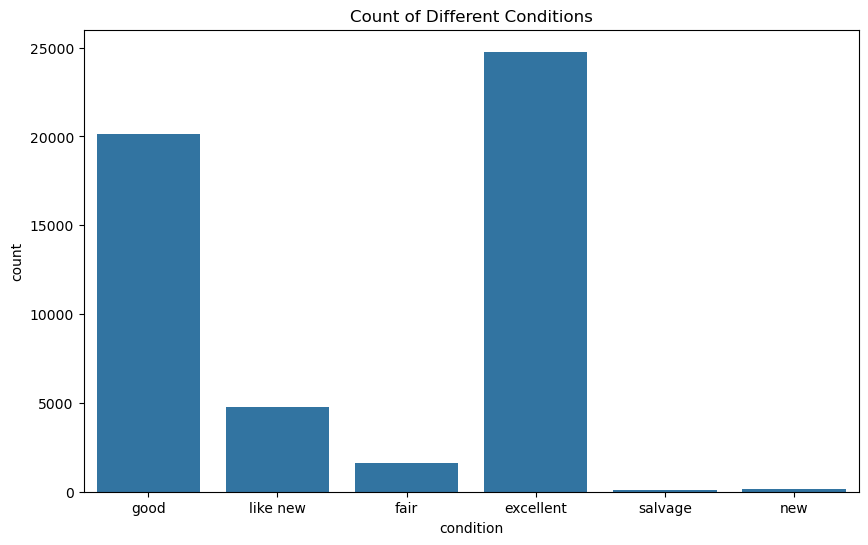

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x='condition', data=df)
plt.title('Count of Different Conditions')
plt.show()

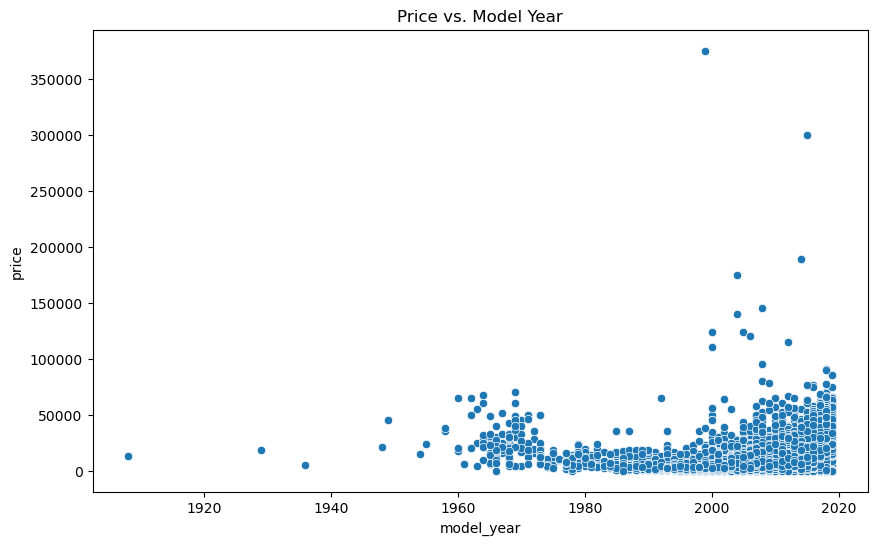

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='model_year', y='price', data=df)
plt.title('Price vs. Model Year')
plt.show()

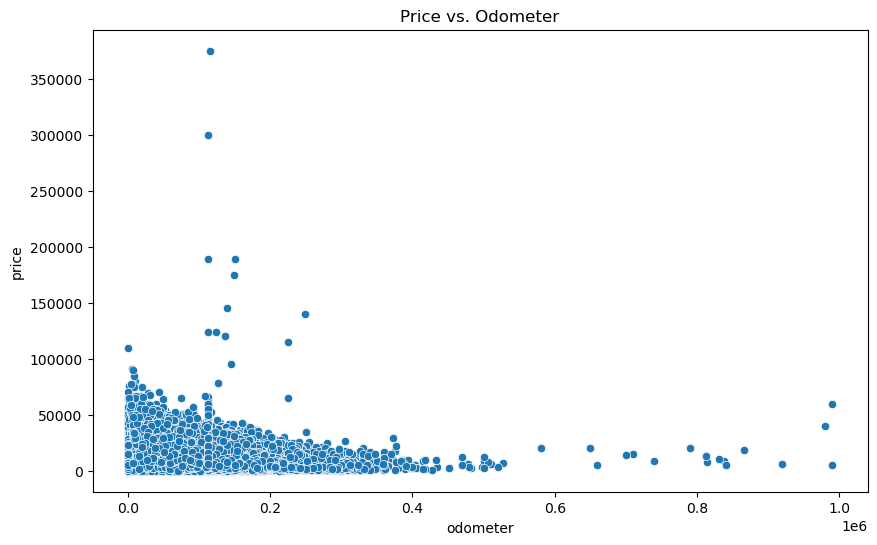

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='odometer', y='price', data=df)
plt.title('Price vs. Odometer')
plt.show()

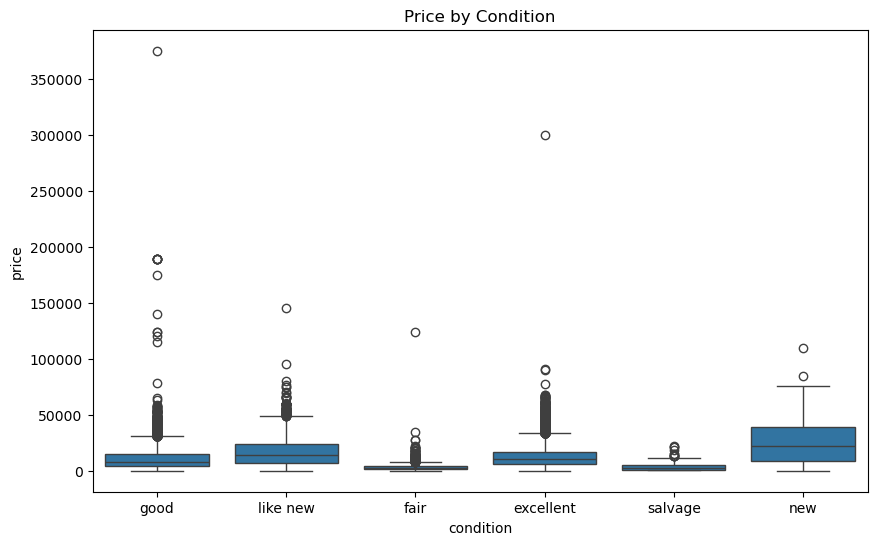

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'condition', y = 'price', data=df)
plt.title('Price by Condition')
plt.show()

In [23]:
average_price = df['price'].mean()
print(f"The average price of the vehicles is: {average_price:.2f}")
print("Most vehicles are listed in good condition.")
print("There is a strong correlation between model year and price.")

The average price of the vehicles is: 12132.46
Most vehicles are listed in good condition.
There is a strong correlation between model year and price.


The average price of the vehicles is: 12132.46 Most vehicles are listed in good condition. There is a strong correlation between model year and price.